### Neural networks from scratch with python


In [2]:
#Every neuron has unique connection to every single previous neuron
#3 neurons

inputs = [1, 2, 3] #Outputs from 3 neurons in previous layer to one neuron
weights = [0.2, 0.8, -0.5] #Every input has unique weight
bias = 2.0

#We add up inputs times the weights plus the bias
output = inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2] + bias
print(f"Output: {output}") 

Output: 2.3


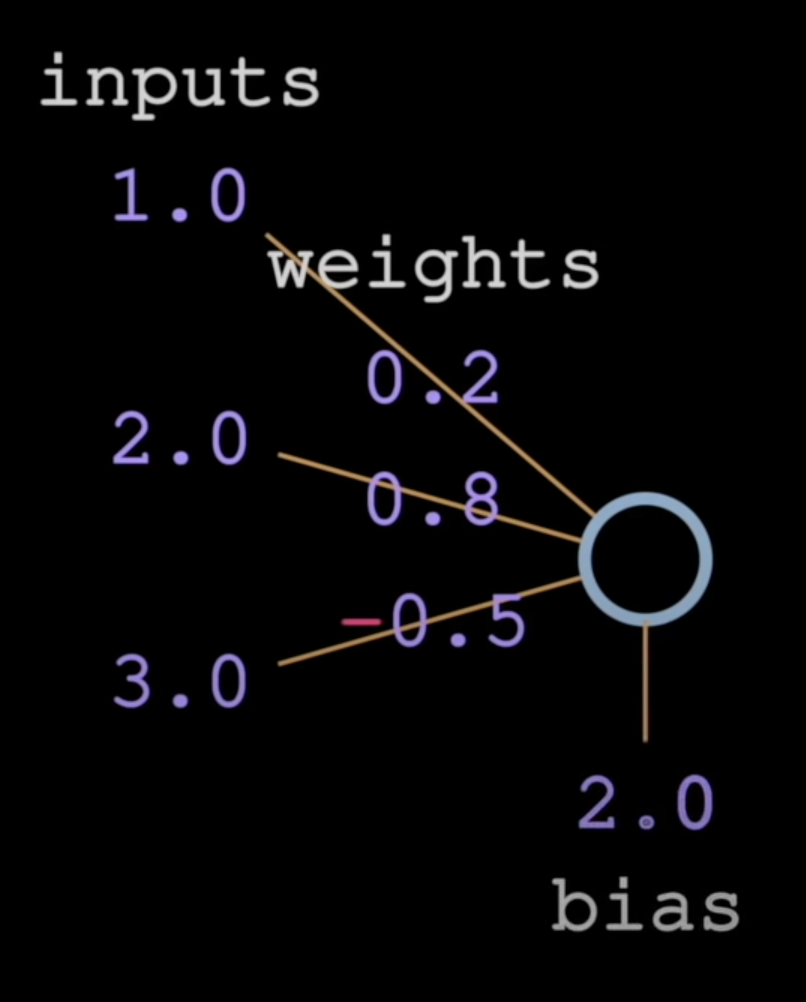

#### Coding a layer

- **Forward pass**: calculate values of the output layer from the input data. A loss function is calculated from the output values
- **Backward pass**: process of counting changes in weights. Computation is made from last layer to first layer.

In [3]:
#Add more input
inputs = [1, 2, 3, 2.5]
weights = [0.2, 0.8, -0.5, 1.0]
bias = 2.0

output = inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2] + inputs[3]*weights[3] + bias
print(f"Output: {output}") 


Output: 4.8


In [6]:
#We just modelled one neuron with four inputs. What if we want to model 3 neurons with 4 inputs?
#We will have 3 unique weight sets and 3 unique biases

inputs= [1, 2, 3, 2.5]

weights1 = [0.2, 0.8, -0.5, 1.0]
weights2 = [0.5, -0.91, 0.26, -0.5]
weights3 = [-0.26, -0.27, 0.17, 0.87]

bias1 = 2.0
bias2 = 3.0
bias3 = 0.5

#Heart of deep learning: how to tune those weights and biases
output = [inputs[0]*weights1[0] + inputs[1]*weights1[1] + inputs[2]*weights1[2] + inputs[3]*weights1[3] + bias1,
          inputs[0]*weights2[0] + inputs[1]*weights2[1] + inputs[2]*weights2[2] + inputs[3]*weights2[3] + bias2,
          inputs[0]*weights3[0] + inputs[1]*weights3[1] + inputs[2]*weights3[2] + inputs[3]*weights3[3] + bias3]
print(output)


[4.8, 1.21, 2.385]


In [13]:
#Same thing as before but iterating. Zip combines two lists into a list of lists element-wise

weights = [weights1, weights2, weights3]
biases = [bias1, bias2, bias3]

layer_outputs = [] #Output of current layer

for neuron_weights, neuron_bias in zip(weights, biases):
    neuron_output = 0
    for n_input, weight in zip(inputs, neuron_weights):
        neuron_output += n_input * weight
    neuron_output += neuron_bias
    layer_outputs.append(neuron_output)

print(layer_outputs)

#OR

outputs = np.dot(weights, inputs) + biases
print(outputs)

[4.8, 1.21, 2.385]
[4.8   1.21  2.385]


In [11]:
import numpy as np

#1D array, vector
array_1D = np.array([[1, 5, 6, 2]])
print(array_1D.shape)

#2D array, matrix
array_2D = np.array([[1, 5, 6, 2], [3, 2, 1, 3]])
print(array_2D.shape)

array_3D = np.array([[[1, 5, 6, 2], [3, 2, 1, 3]], [[5, 2, 1, 2], [6, 4, 8, 4]], [[2, 8, 5, 3], [1, 1, 9, 4]]])
print(array_3D.shape)

(1, 4)
(2, 4)
(3, 2, 4)


### Batches, layers and objects

In [16]:
#We want multiple inputs at a time 
#Batch size of 32 is usually common

#We have 3 samples
inputs = [[1.0, 2.0, 3.0, 2.5], 
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]]
          
#We don't need to change weights and biases because we still have 3 neurons

#outputs = np.dot(weights, inputs) + biases
#print(output)
#We get shape error because dim(inputs) != dim(weights)

#Therefore, we transpose weights to numpy array
outputs = np.dot(inputs, np.array(weights).T) + biases
print(outputs)

[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]


In [17]:
#Add another layer (same-size layer). For that, we add a new set of weights

weights2 = [[0.1, -0.14, 0.5],
          [-0.5, 0.12, -0.33],
          [-0.44, 0.73, -0.13]]

biases2 = [-1, 2, -0.5]

layer1_outputs = np.dot(inputs, np.array(weights).T) + biases
layer2_outputs = np.dot(layer1_outputs, np.array(weights2).T) + biases2

print(layer2_outputs)


[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


In [6]:
import numpy as np

np.random.seed(0)

#Input denoted as X          
X = [[1.0, 2.0, 3.0, 2.5], 
    [2.0, 5.0, -1.0, 2.0],
    [-1.5, 2.7, 3.3, -0.8]]

#We want to start with low weights (-0.1 to 0.1 is good starting point)
#People tend to initialize biases to 0 

class Layer_Dense:
    
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.1*np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases          
        
layer1 = Layer_Dense(4,5)
layer2 = Layer_Dense(5,2)

layer1.forward(X)
print(layer1.output)

#Layer 1 output becomes the input for layer 2
layer2.forward(layer1.output)
print(layer2.output)  

[[ 0.10758131  1.03983522  0.24462411  0.31821498  0.18851053]
 [-0.08349796  0.70846411  0.00293357  0.44701525  0.36360538]
 [-0.50763245  0.55688422  0.07987797 -0.34889573  0.04553042]]
[[ 0.148296   -0.08397602]
 [ 0.14100315 -0.01340469]
 [ 0.20124979 -0.07290616]]


### Hidden layer activation functions

Activation functions determine how the weighted sum of the input is transformed into an output (i.e. it is used to determine the output of the neural networks). Each neuron in the hidden layer as well as the output layer is going to have an acitvation function associated with it. Usually, you have different activation functions in output layers and hidden layers. Types of activation function:

- Step-function (output is either 0 or 1)
- Sigmoid or logistic function 
- ReLU (Rectified linear activation function) (It is the most commonly used function for hidden layers)
- Leaky ReLU
- tanh

The weights impact the outputting slope of the ReLU. If you increase the weight, the slope get's steeper and if you decrease the weight, the slope get's shallower. The last pair of neurons are used to offset the function.


In [2]:
import numpy as np
np.random.seed(0)

X = [[1.0, 2.0, 3.0, 2.5], 
    [2.0, 5.0, -1.0, 2.0],
    [-1.5, 2.7, 3.3, -0.8]]

#ReLU activation function
inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
output = []

for i in inputs:
    if i>0:
        output.append(i)
    elif i <= 0:
        output.append(0)
        
print(output)

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


In [ ]:
import numpy as np
import nnfs

nnfs.init() #To create default data type

#Input denoted as X
X = [[1.0, 2.0, 3.0, 2.5], 
    [2.0, 5.0, -1.0, 2.0],
    [-1.5, 2.7, 3.3, -0.8]]

#We want to start with low weights (-0.1 to 0.1 is good starting point)
#People tend to initialize biases to 0 

class Layer_Dense:
    
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.1*np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
        
class Activation_ReLU:
    def forward(self, inputs):
        self.input = np.maximum(0, inputs)
        
layer1 = Layer_Dense(4,5)
layer2 = Layer_Dense(5,2)

layer1.forward(X)
print(layer1.output)

#Layer 1 output becomes the input for layer 2
layer2.forward(layer1.output)
print(layer2.output)  

In [2]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data

nnfs.init() #To create default data type

#Input denoted as X
X = [[1.0, 2.0, 3.0, 2.5], 
    [2.0, 5.0, -1.0, 2.0],
    [-1.5, 2.7, 3.3, -0.8]]

#100 data points and 3 classes
X,y = spiral_data(100, 3)

class Layer_Dense:
    
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.1*np.random.randn(n_inputs, n_neurons) #0.1 because we want to start with low weights
        self.biases = np.zeros((1, n_neurons))
        
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
        
class Activation_ReLU: #ReLU returns 0 for x<0 and x for x>0
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)
        
layer1 = Layer_Dense(2,5)
activation1 = Activation_ReLU()

layer1.forward(X)

print(f"Layer 1 output: \n{layer1.output}")

#This turns all the 0's in layer1.output a 0
activation1.forward(layer1.output)
print("-------------------------")
print(f"Activation function output: \n{activation1.output}")

Layer 1 output: 
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-8.35815910e-04 -7.90404272e-04 -1.33452227e-03  4.65504505e-04
   4.56846210e-05]
 [-2.39994470e-03  5.93469958e-05 -2.24808278e-03  2.03573116e-04
   6.10024377e-04]
 ...
 [ 1.13291524e-01 -1.89262271e-01 -2.06855070e-02  8.11079666e-02
  -6.71350807e-02]
 [ 1.34588361e-01 -1.43197834e-01  3.09493970e-02  5.66337556e-02
  -6.29687458e-02]
 [ 1.07817926e-01 -2.00809643e-01 -3.37579325e-02  8.72561932e-02
  -6.81458861e-02]]
-------------------------
Activation function output: 
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.65504505e-04
  4.56846210e-05]
 [0.00000000e+00 5.93469958e-05 0.00000000e+00 2.03573116e-04
  6.10024377e-04]
 ...
 [1.13291524e-01 0.00000000e+00 0.00000000e+00 8.11079666e-02
  0.00000000e+00]
 [1.34588361e-01 0.00000000e+00 3.09493970e-02 5.66337556e-02
  0.00000000e+00]
 [1.078

### Softmax activation function (for output layer)

In [3]:
layer_outputs = [4.8, 1.21, 2.385]
#If we only wanted to predict, the prediction is whichever one of these values is the largest

[121.51041751873483, 3.353484652549023, 10.859062664920513]


#### Step 1: Exponentiation

In [9]:
import math
import numpy as np

#Exponential function to solve negative issue by making sure no value can be negative at the output
E = math.e #Euler's number

exp_values = np.exp(layer_outputs)    
print(f"Exponentiated values: {exp_values}")

Exponentiated values: [121.51041752   3.35348465  10.85906266]


#### Step 2: Normalization

In [10]:
norm_values = exp_values / np.sum(exp_values)

print(f"Normalized exponentiated values: {norm_values}") #Probability distribution

Normalized exponentiated values: [0.89528266 0.02470831 0.08000903]


Input → Exponentiate → Normalize → Output

Exponentiation + normalization = Softmax activation function

We won't really have a single output from a layer, but we are most likely to get a batch of outputs from batch of inputs

In [17]:
layer_outputs = [[4.8, 1.21, 2.385],
                 [8.9, -1.81, 0.2],
                 [1.41, 1.051, 0.026]]

#Numpy functions work at individual value level, so we don't need to change that
exp_values = np.exp(layer_outputs)    

norm_values = exp_values / np.sum(exp_values, axis=1, keepdims=True)

print(norm_values)

[[8.95282664e-01 2.47083068e-02 8.00090293e-02]
 [9.99811129e-01 2.23163963e-05 1.66554348e-04]
 [5.13097164e-01 3.58333899e-01 1.28568936e-01]]


In [20]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data

nnfs.init() #To create default data type

class Layer_Dense:
    
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.1*np.random.randn(n_inputs, n_neurons) #0.1 because we want to start with low weights
        self.biases = np.zeros((1, n_neurons))
        
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
        
class Activation_ReLU: #ReLU returns 0 for x<0 and x for x>0
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)
        
class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities
        
        
X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2, 3) #2 input features 
activation1 = Activation_ReLU()

dense2= Layer_Dense(3, 3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

print(activation2.output[:5])

[[0.33333334 0.33333334 0.33333334]
 [0.33331734 0.33331832 0.33336434]
 [0.3332888  0.33329153 0.33341965]
 [0.33325943 0.33326396 0.33347666]
 [0.33323312 0.33323926 0.33352762]]


### Calculating loss with categorical cross-entropy


The loss function in a neural network quantifies the difference between the expected outcome and the outcome produced by the machine learning model

- Categorical cross-entropy

Categorical cross-entropy to quantify the difference between two probability distributions

- One-hot encoding  

Some learning algorithms only work with numerical feature vectors. When some feature in your dataset is categorical, like “colors” or “days of the week”, you can transform such a categorical feature into several binary ones. 

You have a vector n-classes long. In the vector you have a 0, except at the target class where you have a 1. 

Example: 

red = [1, 0, 0]

yellow = [0, 1, 0] 

green = [0, 0, 1]


In [5]:
import numpy as np
import math

softmax_output = [0.7, 0.1, 0.2]
target_output = [1, 0, 0]

loss = -math.log(softmax_output[0])
print(f"Loss: {loss}")

0.35667494393873245
Loss: 0.35667494393873245


In [12]:
print(f"Log with 0.5 confidence interval: {-math.log(0.5)}")
print(f"Log with 0.7 confidence interval: {-math.log(0.7)}")

#If confidence (P) is higher, loss is lower
#If confidence (P) is lower, loss is higher

Log with 0.5 confidence interval: 0.6931471805599453
Log with 0.7 confidence interval: 0.35667494393873245


### Implementing loss

Up to this point for calculating loss, we have only considered one sample, but in reality we would be feeding multiple samples at a time which will return a batch of softmax outputs.

In [8]:
softmax_outputs = np.array([[0.7, 0.1, 0.2],
                            [0.1, 0.5, 0.4],
                            [0.02, 0.9, 0.08]])

class_targets = [0, 1, 1]
print(softmax_outputs[[0, 1, 2], class_targets]) #class targets defines what indices we are interested in

[0.7 0.5 0.9]
